<a href="https://colab.research.google.com/github/surendar-05/LexMachina/blob/main/LexMachina_llama32_agentic_rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🕵🏻 Agentic RAG with 🦙 Llama 3.2 3B**
  <img src="https://img-cdn.inc.com/image/upload/w_1280,ar_16:9,c_fill,g_auto,q_auto:best/images/panoramic/meta-llama3-inc_539927_dhgoal.webp" width="310"/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://haystack.deepset.ai/images/haystack-ogimage.png" width="350" style="display:inline;">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src="https://upload.wikimedia.org/wikipedia/en/thumb/8/88/DuckDuckGo_logo.svg/800px-DuckDuckGo_logo.svg.png" width="230" style="display:inline;">

In their [Llama 3.2 collection](https://ai.meta.com/blog/llama-3-2-connect-2024-vision-edge-mobile-devices/), Meta released two small yet powerful Language Models.

In this notebook, we'll use the 3B model to build an **Agentic Retrieval Augmented Generation application**.

Stack:
- 🏗️ [Haystack](https://haystack.deepset.ai/): open-source LLM orchestration framework that streamlines the development of your LLM applications.

- 🦙 [Llama-3.2-3B-Instruct](https://huggingface.co/meta-llama/Llama-3.2-3B-Instruct): small and good Language Model.

- 🦆🌐 [DuckDuckGo API Websearch](https://haystack.deepset.ai/integrations/duckduckgo-api-websearch) to search results on the Web.


## Setup

In [1]:
! pip install haystack-ai duckduckgo-api-haystack transformers sentence-transformers datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.

## Create our knowledge base

In this section, we download a dataset on the Seven Wonders of the Ancient World, enrich each document with a semantic vector and store the documents in an in-memory database.

To better understand this process, you can explore to the [introductory Haystack tutorial](https://haystack.deepset.ai/tutorials/27_first_rag_pipeline).

In [2]:
from datasets import load_dataset
from haystack import Document

from haystack.document_stores.in_memory import InMemoryDocumentStore
from haystack.components.embedders import SentenceTransformersDocumentEmbedder

document_store = InMemoryDocumentStore()

dataset = load_dataset("KarthiDreamr/indian-law-dataset", split="train")
docs = [Document(content=doc["content"], meta=doc["meta"]) for doc in dataset]

doc_embedder = SentenceTransformersDocumentEmbedder(model="sentence-transformers/all-MiniLM-L6-v2")
doc_embedder.warm_up()

docs_with_embeddings = doc_embedder.run(docs)
document_store.write_documents(docs_with_embeddings["documents"])




/usr/local/lib/python3.10/dist-packages/haystack/core/errors.py:34: DeprecationWarning: PipelineMaxLoops is deprecated and will be remove in version '2.7.0'; use PipelineMaxComponentRuns instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


indian-law-dataset.parquet:   0%|          | 0.00/5.44k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3 [00:00<?, ? examples/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

3

## Load and try Llama 3.2

We will use Hugging Face Transformers to load the model on a Colab.

There are plenty of other options to use open models on Haystack, including for example [Ollama](https://haystack.deepset.ai/integrations/ollama) for local inference or serving with [Groq](https://haystack.deepset.ai/integrations/groq).

\([📕 Choosing the Right Generator](https://docs.haystack.deepset.ai/docs/choosing-the-right-generator)\).


**Authorization**
- you need an Hugging Face account
- you need to accept Meta conditions here: https://huggingface.co/meta-llama/Llama-3.2-3B-Instruct and wait for the authorization

In [3]:
import getpass, os

os.environ["HF_TOKEN"] = getpass.getpass("Your Hugging Face token")

Your Hugging Face token··········


In [4]:
import torch
from haystack.components.generators import HuggingFaceLocalGenerator

generator = HuggingFaceLocalGenerator(
    model="meta-llama/Llama-3.2-3B-Instruct",
    huggingface_pipeline_kwargs={"device_map":"auto",
                                 "torch_dtype":torch.bfloat16},
    generation_kwargs={"max_new_tokens": 256})

generator.warm_up()

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [5]:
prompt = """<|begin_of_text|><|start_header_id|>user<|end_header_id|>
  What is the capital of France?<|eot_id|>
  <|start_header_id|>assistant<|end_header_id|>"""

generator.run(prompt)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


{'replies': ['\n\nThe capital of France is Paris.']}

## Build the 🕵🏻 Agentic RAG Pipeline

Here's the idea 👇
- Perform a vector search on our knowledge base using the query.
- Pass the top 5 documents to Llama, injected in a specific prompt
- In the prompt, instruct the model to reply with "no_answer" if it cannot infer the answer from the documents; otherwise, provide the answer.
- If "no_answer" is returned, run a web search and inject the results into a new prompt.
- Let Llama generate a final answer based on the web search results.

For a detailed explanation of a similar use case, take a look at [this tutorial: Building Fallbacks to Websearch with Conditional Routing](https://haystack.deepset.ai/tutorials/36_building_fallbacks_with_conditional_routing).

### Retrieval part

Let's initialize the components to use for the initial retrieval phase.

In [20]:
from haystack.components.embedders import SentenceTransformersTextEmbedder
from haystack.components.retrievers.in_memory import InMemoryEmbeddingRetriever

text_embedder = SentenceTransformersTextEmbedder(model="sentence-transformers/all-MiniLM-L6-v2")
retriever = InMemoryEmbeddingRetriever(document_store, top_k=5)

### Prompt template

Let's define the first prompt template, which instructs the model to:
- answer the query based on the retrieved documents, if possible
- reply with 'no_answer', otherwise

In [7]:
from haystack.components.builders import PromptBuilder

prompt_template = """
<|begin_of_text|><|start_header_id|>user<|end_header_id|>

Answer the following query given the documents.
If the answer is not contained within the documents reply with 'no_answer'.
If the answer is contained within the documents, start the answer with "FROM THE KNOWLEDGE BASE: ".

Documents:
{% for document in documents %}
  {{document.content}}
{% endfor %}

Query: {{query}}<|eot_id|>

<|start_header_id|>assistant<|end_header_id|>
"""

prompt_builder = PromptBuilder(template=prompt_template)

### Conditional Router

This is the component that will perform data routing, depending on the reply given by the Language Model.

In [8]:
from haystack.components.routers import ConditionalRouter

routes = [
    {
        "condition": "{{'no_answer' in replies[0]}}",
        "output": "{{query}}",
        "output_name": "go_to_websearch",
        "output_type": str,
    },
    {
        "condition": "{{'no_answer' not in replies[0]}}",
        "output": "{{replies[0]}}",
        "output_name": "answer",
        "output_type": str,
    },
]

router = ConditionalRouter(routes)

In [9]:
router.run(replies=["this is the answer!"])

{'answer': 'this is the answer!'}

In [10]:
router.run(replies=["no_answer"], query="my query")

{'go_to_websearch': 'my query'}

### Web search

In [11]:
from duckduckgo_api_haystack import DuckduckgoApiWebSearch

websearch = DuckduckgoApiWebSearch(top_k=5)

In [12]:
# Perform a search
results = websearch.run(query="Is there any consumer disputes supporting laws in India ?")

# Access the search results
documents = results["documents"]
links = results["links"]

print("Found documents:")
for doc in documents:
    print(f"Content: {doc.content}")

print("\nSearch Links:")
for link in links:
    print(link)

Found documents:
Content: introducing an effective and time bound settlement of consumer disputes. I am happy to know that the Chair on Consumer Law and Practice, National Law School of India University (NLSIU), Bengaluru, in association with the Dept. of Consumer Affairs is publishing the book titled "Landmark Judgements of Consumer Protection Laws: 2008-2020".
Content: The Consumer Protection Act of 1986 was a milestone in this regard, providing a framework for the redressal of consumer grievances. Over the years, numerous landmark cases have shaped consumer rights in the country. 1. 1. Manjeet Singh Vs. National Insurance Company Ltd. & Anr.
Content: The United States has a robust system of consumer protection laws and agencies. The Federal Trade Commission (FTC) is the primary federal enforcement agency, responsible for investigating and taking legal action against deceptive and unfair business practices. Additionally, each state has its own consumer protection laws and agencies.
C

### Prompt template after Web search

In [13]:
prompt_template_after_websearch = """
<|begin_of_text|><|start_header_id|>user<|end_header_id|>

Answer the following query given the documents retrieved from the web.
Start the answer with "FROM THE WEB: ".

Documents:
{% for document in documents %}
  {{document.content}}
{% endfor %}

Query: {{query}}<|eot_id|>

<|start_header_id|>assistant<|end_header_id|>
"""

prompt_builder_after_websearch = PromptBuilder(template=prompt_template_after_websearch)

### Assembling the Pipeline

Now that we have all the components, we can assemble the full pipeline.

To handle the different prompt sources, we'll use a [`BranchJoiner`](https://docs.haystack.deepset.ai/docs/branchjoiner). This allows us to connect multiple output sockets (with prompts) to our language model. In our case, the prompt will either come from the initial `prompt_builder` or from `prompt_builder_after_websearch`.

In [14]:
from haystack.components.joiners import BranchJoiner
prompt_joiner  = BranchJoiner(str)

from haystack import Pipeline

pipe = Pipeline()
pipe.add_component("text_embedder", text_embedder)
pipe.add_component("retriever", retriever)
pipe.add_component("prompt_builder", prompt_builder)
pipe.add_component("prompt_joiner", prompt_joiner)
pipe.add_component("llm", generator)
pipe.add_component("router", router)
pipe.add_component("websearch", websearch)
pipe.add_component("prompt_builder_after_websearch", prompt_builder_after_websearch)

pipe.connect("text_embedder", "retriever")
pipe.connect("retriever", "prompt_builder.documents")
pipe.connect("prompt_builder", "prompt_joiner")
pipe.connect("prompt_joiner", "llm")
pipe.connect("llm.replies", "router.replies")
pipe.connect("router.go_to_websearch", "websearch.query")
pipe.connect("router.go_to_websearch", "prompt_builder_after_websearch.query")
pipe.connect("websearch.documents", "prompt_builder_after_websearch.documents")
pipe.connect("prompt_builder_after_websearch", "prompt_joiner")

🚅 Components
  - text_embedder: SentenceTransformersTextEmbedder
  - retriever: InMemoryEmbeddingRetriever
  - prompt_builder: PromptBuilder
  - prompt_joiner: BranchJoiner
  - llm: HuggingFaceLocalGenerator
  - router: ConditionalRouter
  - websearch: DuckduckgoApiWebSearch
  - prompt_builder_after_websearch: PromptBuilder
🛤️ Connections
  - text_embedder.embedding -> retriever.query_embedding (List[float])
  - retriever.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> prompt_joiner.value (str)
  - prompt_joiner.value -> llm.prompt (str)
  - llm.replies -> router.replies (List[str])
  - router.go_to_websearch -> websearch.query (str)
  - router.go_to_websearch -> prompt_builder_after_websearch.query (str)
  - websearch.documents -> prompt_builder_after_websearch.documents (List[Document])
  - prompt_builder_after_websearch.prompt -> prompt_joiner.value (str)

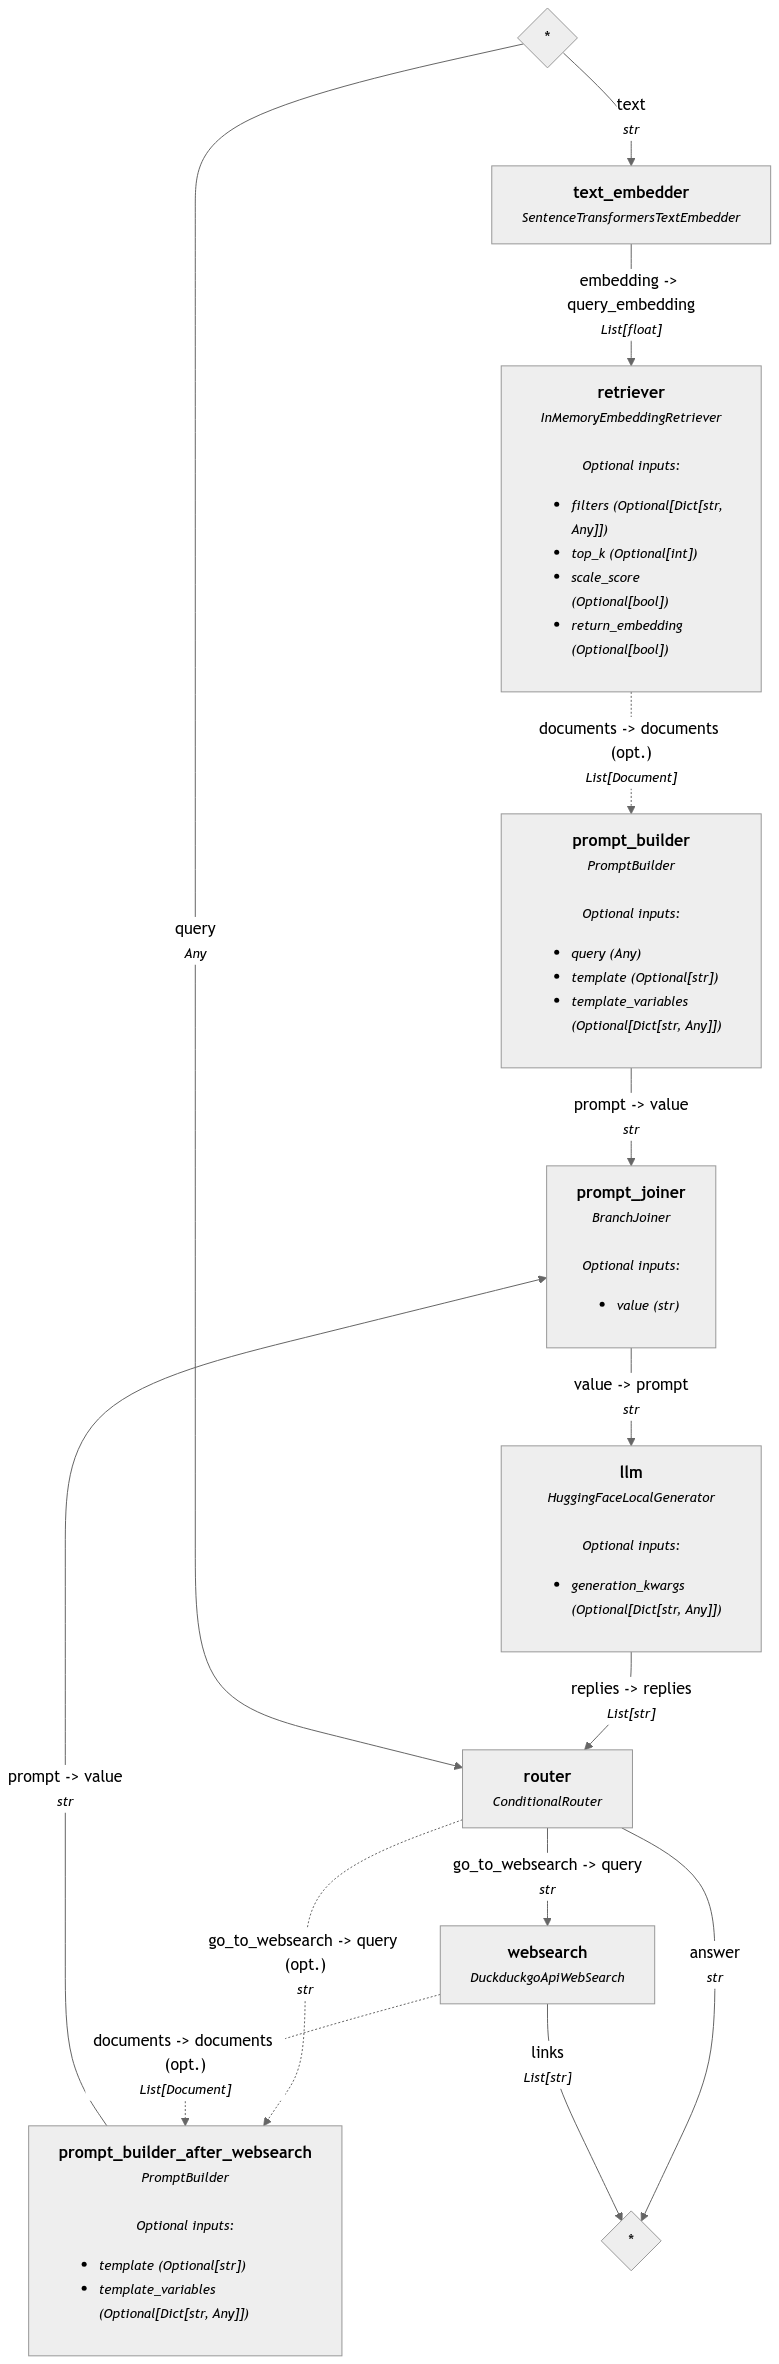

In [15]:
pipe.show()

## Agentic RAG in action! 🔎

In [16]:
def get_answer(query):
  result = pipe.run({"text_embedder": {"text": query}, "prompt_builder": {"query": query}, "router": {"query": query}})
  print(result["router"]["answer"])

In [ ]:
query = "Is there any law relating cheating and dishonestly inducing delivery of property "

get_answer(query)

In [ ]:
query = "Explan newton's law?"

get_answer(query)

In [ ]:
query = "Any law in india regarding protect women from harassment in a marital relationship"

get_answer(query)

*(Notebook by [Stefano Fiorucci](https://github.com/anakin87))*